# Going The Distance: How Travel Behavior Influences Climate-Related

Policy Preferences in Washington State

Tiernan Martin (Futurewise)

This research investigates how household travel behavior in Washington State influences voter support for climate-related fiscal policies, such as carbon taxes and cap-and-trade systems, using a harmonized census tract-scale dataset and multiple statistical models.

In [ ]:
library(here)

here() starts at C:/Users/tiern/Documents/R/2024-wa-climate-voting

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
To enable caching of data, set `options(tigris_use_cache = TRUE)`
in your R script or .Rprofile.


Attaching package: 'tigris'


The following object is masked from 'package:tidycensus':

    fips_codes



Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test


Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack



Attaching package: 'spatialreg'


The following objects are ma

## 1 Introduction

This research explores the relationship between household travel behavior and voter preferences for climate-related fiscal policy in Washington State. We examine how variations in travel patterns might influence public support for specific climate change change-related fiscal policies such as carbon taxes or “cap and trade” emission trading systems. The analysis builds a harmonized, census tract-scale data set and uses several statistical models to explore the relationship between these variables.

## 2 Data and Methods

### 2.1 Data Opertionalization

-   **Travel Behavior:** Represented by average daily vehicle miles traveled (VMT) per household, sourced from the US Department of Transportation’s Local Characteristics for Households [dataset](https://www.bts.gov/latch/latch-data). This metric reflects household mobility patterns.
-   **Voter Preferences for Climate-Related Taxes:** Quantified through the results of two ballot initiatives: [I-732](https://leg.wa.gov/House/Committees/OPRGeneral/Documents/2016/Initiative732Summary.pdf "Summary of Initiative 732 (2016)") in 2016, which proposed a carbon fee aimed at reducing greenhouse gas emissions; and [I-1631](https://leg.wa.gov/House/Committees/OPRGeneral/Documents/2018/Initiative1631Summary.pdf "Summary of Initiative 1631 (2018)") in 2018, which proposed a similar fee that would have funded a variety of climate justice programs. The results of these ballot initiatives serve as a direct measure of voter support for climate-related taxation.
-   **Political Partisanship:** Operationalized using the results of 2016 presidential election and 2018 US Senate election, indicating the political values of voters, which may influence their support for environment- and/or taxation-related policy.

The study data are reported in two non-coterminous geographies: census tracts and voting precincts. Our method uses population-weighted areal interpolation to estimate voting precinct results at the census tract scale.[1]

The study data is divided in two subsets, one for the 2016 election and another for the 2018 election; the average daily VMT results are only available for 2016, so that data is joined to both election data subsets to construct the study database.

### 2.2 Model Descriptions

Our method fits a series of linear regression models of increasing complexity in order to understand the relationship between our explanatory and response variables. Each model type is fit to the two subsets of the study database.

#### 2.2.1 Univariate Linear Models

The first model type is a univariate Ordinary Least Squares regression that assumes a direct relationship between voter support for the climate-related tax and household travel behavior. We fit the model to This model is articulated through the following linear equation:

$$
y_i = \beta_0 + \beta_1x_{1i} + \epsilon_i
$$

In this equation:

-   $y_i$ represents the response variable, specifically the share of ‘No’ votes on I-732 or I-1631.
-   $\beta_0$ is the y-axis intercept, indicating the baseline level of opposition to the initiative when average daily VMT per household is zero.
-   $\beta_1x_{1i}$ is the coefficient for the explanatory variable, average daily VMT per household, which quantifies the change in the proportion of ‘No’ votes as VMT varies.
-   $\epsilon_i$ denotes the random error term, accounting for the variation in ‘No’ votes not explained by travel behavior.

Here, $y_i$ represents the response variable (share of ‘No’ votes on I-732 or I-1631), $\beta_0$ is the model’s y-axis intercept, $\beta_1x_{1i}$ is the coefficient of the explanatory variable (average daily VMT per household), and $\epsilon_i$ represents the random error term.

This model establishes a baseline for identifying potential correlations between travel behavior and voter preferences regarding climate-related taxes, without considering any other confounding factors. It provides a straightforward way to assess the primary effect of travel on voting behavior before introducing more complexity into the analysis.

#### 2.2.2 Multivariate Linear Model

Expanding upon the univariate linear model, the multivariate linear model incorporates an additional explanatory variable: political partisanship. This model is specified through the following equation:

$$
y_i = \beta_0 + \beta_1x_{1i} + \beta_2x_{2i} + \epsilon_i
$$

In this equation, $\beta_2x_{2i}$ is the coefficient of the additional explanatory variable (share of votes for the Republican presidential candidate in 2016 or the Republican US Senate candidate in 2018).

This model evaluates how both travel behavior and political orientation together affect support for climate-related taxes.

#### 2.2.3 Spatial Lag Model

The Spatial Lag Model refines the multivariate Extended Linear Model by including a spatial lag variable that accounts for “spillover effect” (i.e., spatial autocorrelation of model residuals) of the multivariate linear model’s dependent variable.

$$
y_i = \beta_0 + \beta_1x_{1i} + \beta_2x_{2i} + \rho w \cdot y_i + \epsilon_i
$$

In this equation:

-   $\rho$ is the spatial-autoregressive coefficient
-   $w$ is a spatial weights matrix

Each model progressively incorporates more complexity to address different hypotheses about the influences on voter preferences regarding climate policy in Washington State. This approach allows for a nuanced analysis, distinguishing direct effects from those mediated by political identity or spatial proximity.

## 3 Results

### 3.1 Data

Exploratory data analysis of the study database suggests that a positive relationship may exist between the response variable (climate initiative voting results) and the primary explanatory variable (average daily VMT).

<figure>
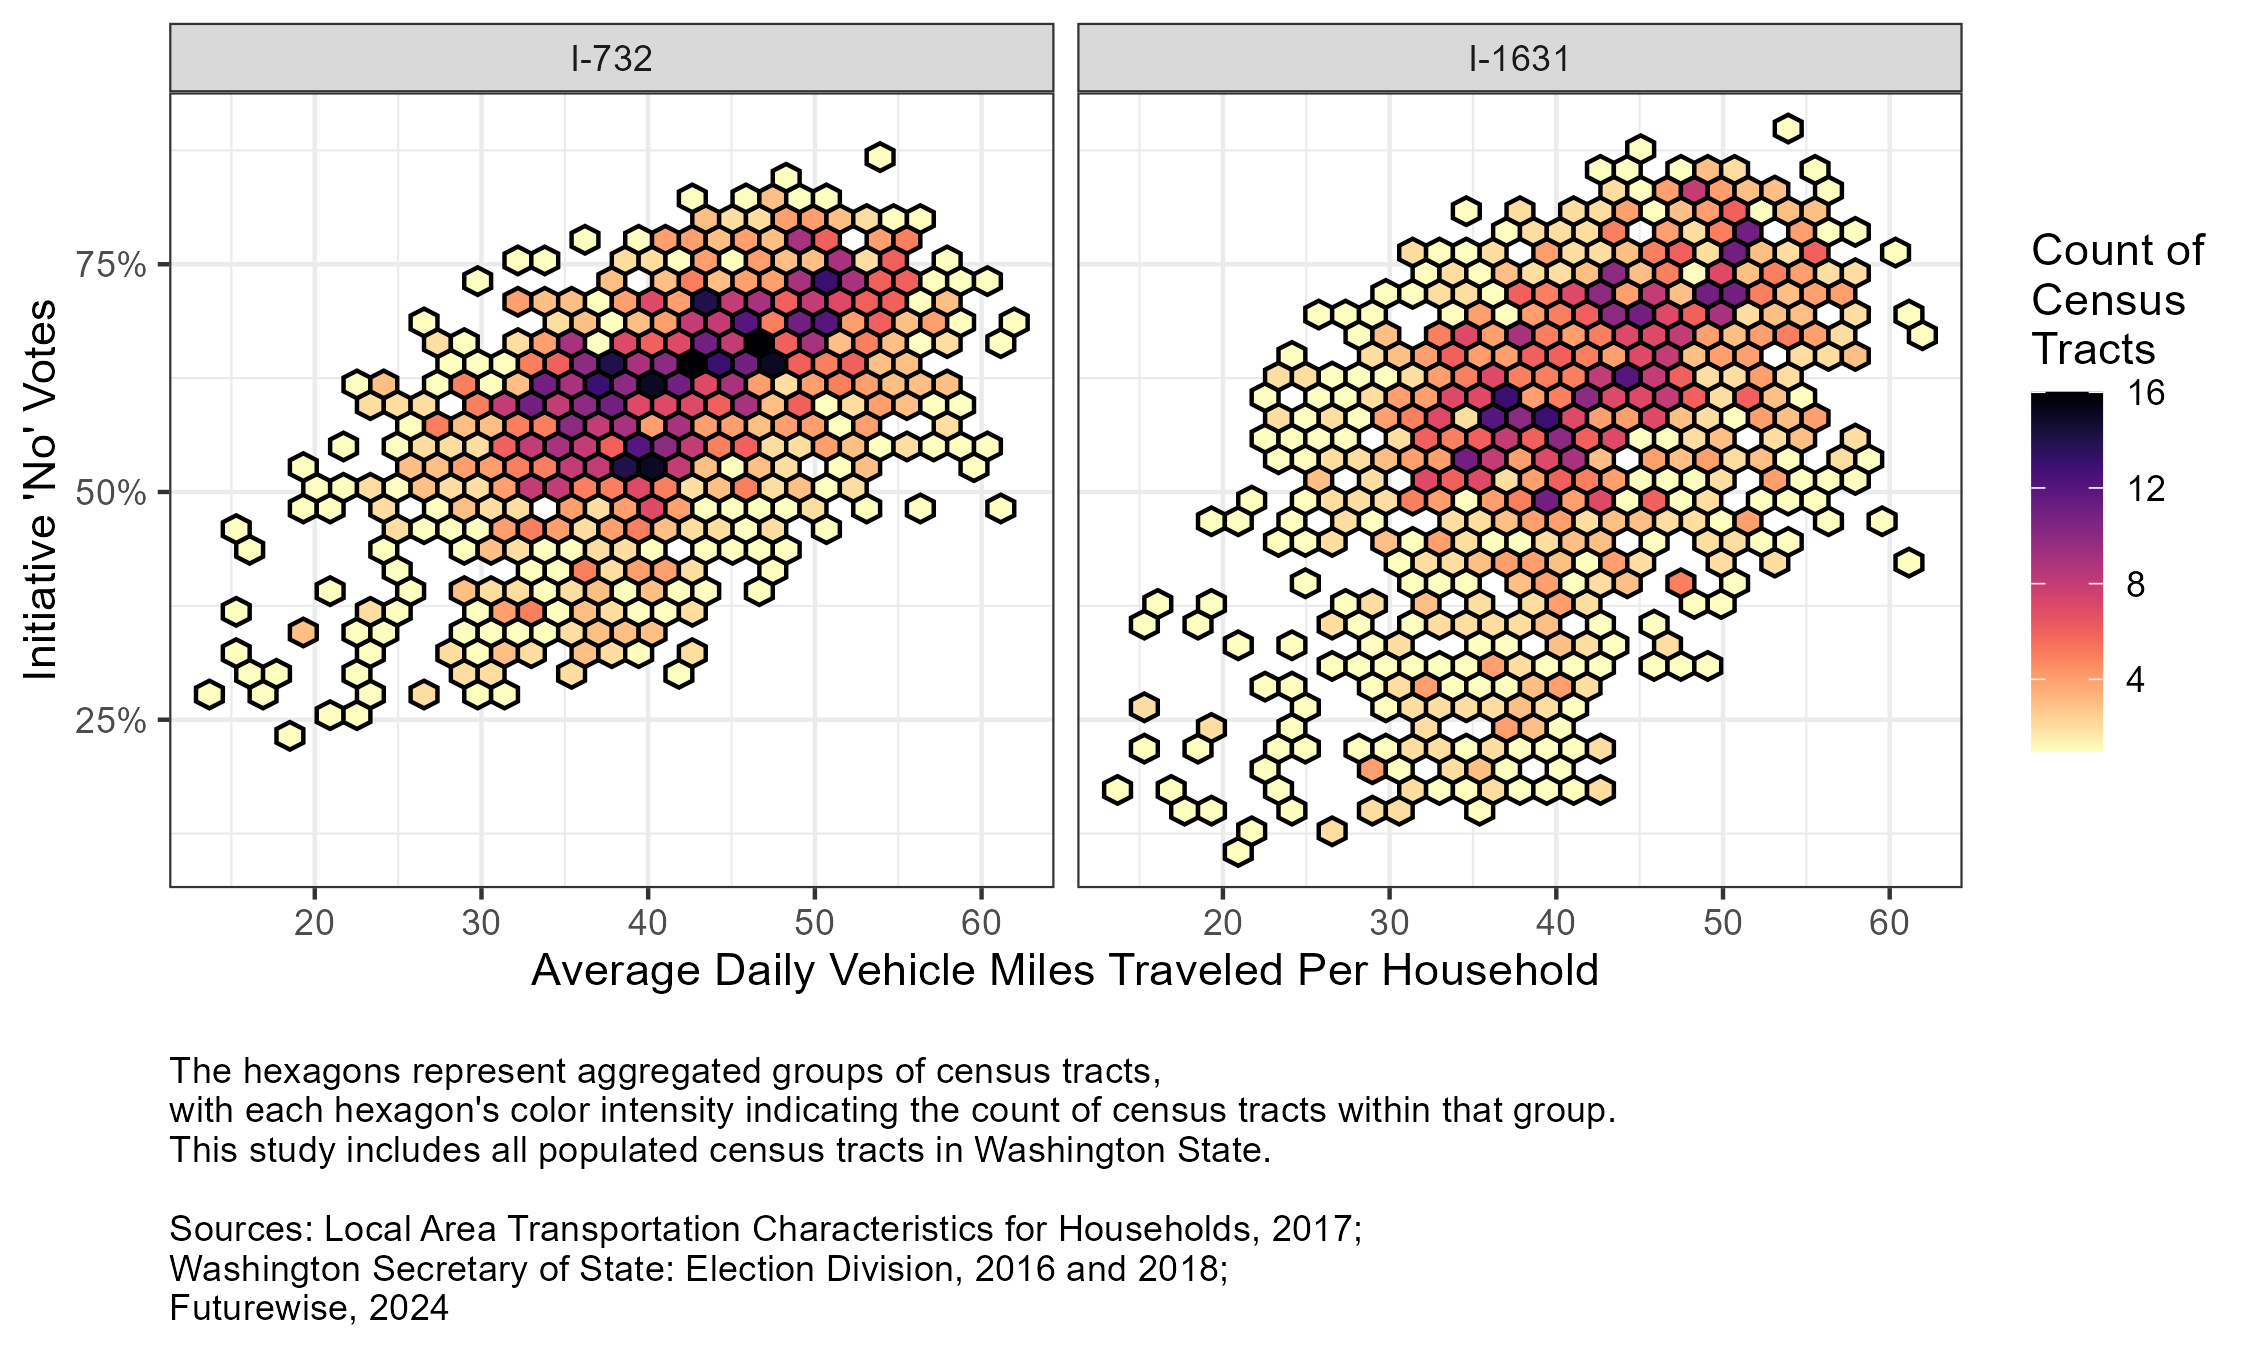
<figcaption aria-hidden="true">Hexagonal bin scatterplot of the study’s primary response and explanatory variables</figcaption>
</figure>

Introducing political partisanship as an intervening variable in the data visualization suggests that it will likely have a significant impact on the model coefficients.

<figure>
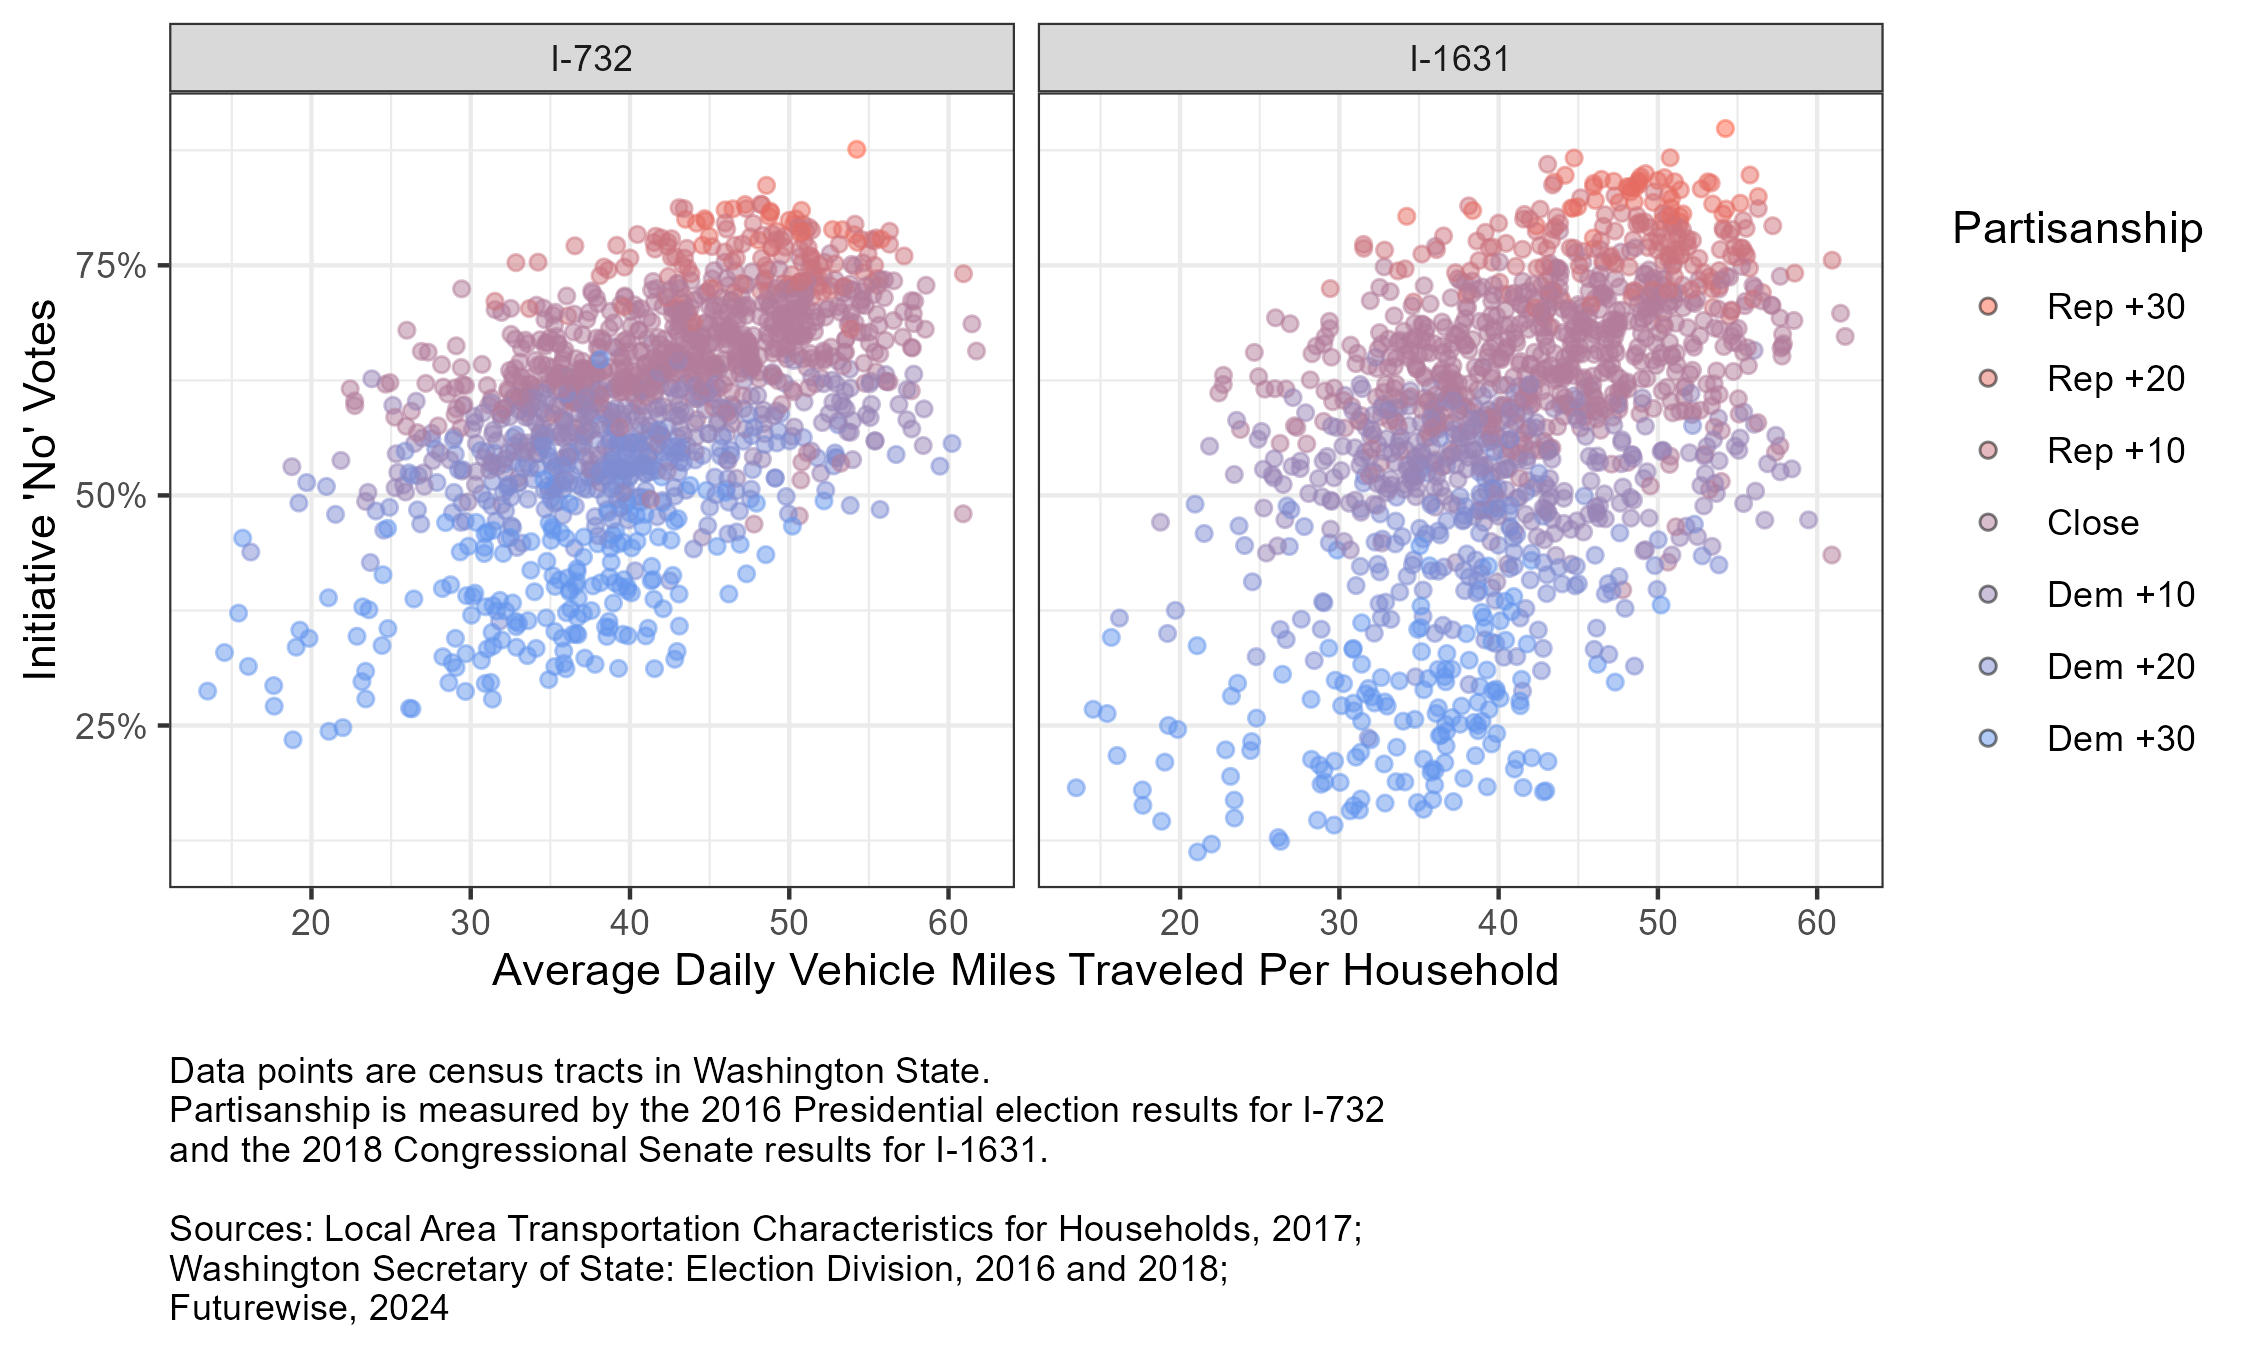
<figcaption aria-hidden="true">Scatterplot showing the relationship between climate-initiative voting, travel behavior, and political partisanship.</figcaption>
</figure>

### 3.2 Models

The results of the three model types fit to each data subset are summarized in the table below:

[1] The study uses the `interpolate_pw()` function from the [tidycensus](https://walker-data.com/tidycensus/) package to estimate voting precinct results at the census tract scale.

In [ ]:
model_list <- list(
  "i732_uni" = model_i732_lm_univariate,
  "i1631_uni" =   model_i1631_lm_univariate,
  "i732_multi" =    model_i732_lm_multivariate,
  "i1631_multi" =   model_i1631_lm_multivariate,
  "i732_spatial" =   model_i732_spatial_lag,
  "i1631_spatial" =   model_i1631_spatial_lag)

model_param_table <- compare_parameters(model_list, 
                   pretty_names = "labels",
                   select = "se_p")

print_html(model_param_table)

## 4 Discussion

The univariate model results suggest a straightforward relationship: opposition to climate-related taxes is positively correlated with the average vehicle miles traveled. For I-732, for each additional mile traveled, we expect opposition to increase by 0.74%. For I-1631, that increase is 0.93%. In both cases, the results are statistically significant.

However, introducing political partisanship in the multivariate model significantly changes the results. For I-732, the coefficient drops to a 0.13% increase in opposition per additional mile traveled, and the coefficient remains statistically significant. For I-1631, the coefficient reduces to near zero and becomes non-significant.

Accounting for spatial autocorrelation in the data yields similar results: the explanatory power of household VMT significantly reduces the effect of political partisanship on the response variable. This result suggests that spatial proximity plays a meaningful role in the underlying relationships explored in the study.

## 5 Appendix

### 5.1 Data Sources

-   Voting Precinct Shapefiles: https://www.sos.wa.gov/elections/data-research/election-data-and-maps/reports-data-and-statistics/precinct-shapefiles

-   Election Results: https://www.sos.wa.gov/elections/data-research/election-data-and-maps/election-results-and-voters-pamphlets

-   American Community Survey: https://www.census.gov/programs-surveys/acs/data.html

-   2017 Local Area Transportation Characteristics for Households https://www.bts.gov/latch/latch-data

### 5.2 Methodology Notes

-   Income should not be included in our regression because it is used in the model that estimates household VMT (see LATCH Methodology p. 10)

### 5.3 Individual Model Parameters

#### 5.3.1 Initiative 732

In [ ]:
model_data_i732_skim <- model_data_i732 |> 
  drop_na() |> 
  st_drop_geometry() 

skim(model_data_i732_skim)

In [ ]:
model_data_i732 |> 
  drop_na() |> 
  mapview(zcol = "hh_vmt", layer.name = "Avg. Daily VMT")

In [ ]:
model_data_i732 |> 
  drop_na() |> 
  mapview(zcol = "vote_i0732n_pct", layer.name = "% 'No' on I-732")

In [ ]:
model_data_i732 |> 
  drop_na() |> 
  mapview(zcol = "vote_rep_pct", layer.name = "% Rep. for President (2016)")

#### 5.3.2 Univariate OLS Linear Model

Univariate model paramaters:

In [ ]:
summary(model_i732_lm_univariate)


Call:
lm(formula = vote_no_pct ~ hh_vmt, data = model_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.662  -5.692   1.427   6.513  21.903 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.05730    1.27471   22.80   <2e-16 ***
hh_vmt       0.74096    0.03022   24.52   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.462 on 1429 degrees of freedom
Multiple R-squared:  0.2962,    Adjusted R-squared:  0.2957 
F-statistic: 601.3 on 1 and 1429 DF,  p-value: < 2.2e-16

Univariate model assumption checks:

In [ ]:
performance::check_model(model_i732_lm_univariate)

#### 5.3.3 Multivariate OLS Linear Model

Multivariate model paramaters:

In [ ]:
summary(model_i732_lm_multivariate)


Call:
lm(formula = vote_no_pct ~ hh_vmt + vote_rep_pct, data = model_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.3425  -1.6101   0.2636   1.9773  19.0971 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.91813    0.41628   69.47   <2e-16 ***
hh_vmt        0.16128    0.01120   14.40   <2e-16 ***
vote_rep_pct  0.61492    0.00562  109.42   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.09 on 1428 degrees of freedom
Multiple R-squared:  0.925, Adjusted R-squared:  0.9249 
F-statistic:  8805 on 2 and 1428 DF,  p-value: < 2.2e-16

Multivariate model assumption checks:

In [ ]:
performance::check_model(model_i732_lm_multivariate)

Spatial Autocorrelation check (Moran I test):

In [ ]:
moran.test(residuals(model_i732_lm_multivariate), model_i732_spatial_weights)


    Moran I test under randomisation

data:  residuals(model_i732_lm_multivariate)  
weights: model_i732_spatial_weights  
n reduced by no-neighbour observations  

Moran I statistic standard deviate = 29.925, p-value < 2.2e-16
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
     0.4875875930     -0.0007007708      0.0002662552 

#### 5.3.4 Spatially Lagged Regression

Spatial lag model parameters:

In [ ]:
summary(model_i732_spatial_lag, Nagelkerke = TRUE)


Call:lagsarlm(formula = model_lm_multivariate, data = model_data, 
    listw = model_spatial_weights, zero.policy = TRUE)

Residuals:
      Min        1Q    Median        3Q       Max 
-18.95558  -1.63454   0.16726   1.80358  18.90741 

Type: lag 
Regions with no neighbours included:
 523 1102 1253 
Coefficients: (asymptotic standard errors) 
              Estimate Std. Error z value  Pr(>|z|)
(Intercept)  19.431901   0.683653  28.424 < 2.2e-16
hh_vmt        0.150062   0.010119  14.829 < 2.2e-16
vote_rep_pct  0.455436   0.010999  41.406 < 2.2e-16

Rho: 0.27083, LR test value: 273.23, p-value: < 2.22e-16
Asymptotic standard error: 0.016385
    z-value: 16.529, p-value: < 2.22e-16
Wald statistic: 273.21, p-value: < 2.22e-16

Log likelihood: -3506.789 for lag model
ML residual variance (sigma squared): 7.7613, (sigma: 2.7859)
Nagelkerke pseudo-R-squared: 0.93803 
Number of observations: 1431 
Number of parameters estimated: 5 
AIC: 7023.6, (AIC for lm: 7294.8)
LM test for residual autoco

Parameter comparison: OLS vs Spatial Lag

In [ ]:
compare_parameters(model_i732_lm_univariate,model_i732_lm_multivariate,model_i732_spatial_lag)

Parameter    | model_i732_lm_univariate | model_i732_lm_multivariate | model_i732_spatial_lag
---------------------------------------------------------------------------------------------
(Intercept)  |     29.06 (26.56, 31.56) |       28.92 (28.10, 29.73) |   19.43 (18.09, 20.77)
hh vmt       |      0.74 ( 0.68,  0.80) |        0.16 ( 0.14,  0.18) |                       
vote rep pct |                          |        0.61 ( 0.60,  0.63) |                       
rho          |                          |                            |    0.27 ( 0.24,  0.30)
hh_vmt       |                          |                            |    0.15 ( 0.13,  0.17)
vote_rep_pct |                          |                            |    0.46 ( 0.43,  0.48)
---------------------------------------------------------------------------------------------
Observations |                     1431 |                       1431 |                       

Comparison of Adjusted R<sup>2</sup>/Pseudo Adjusted R<sup>2</sup>: OLS vs Spatial Lag

In [ ]:
model_i732_lm_univariate_r2_adj <- r2(model_i732_lm_univariate) |> pluck("R2_adjusted")

model_i732_lm_multivariate_r2_adj <- r2(model_i732_lm_multivariate) |> pluck("R2_adjusted")

model_i732_spatial_lag_r2_adj <- model_i732_spatial_lag |> 
  summary(Nagelkerke = TRUE) |> 
  pluck("NK")

tibble(
  "univariate" = model_i732_lm_univariate_r2_adj,
  "multivariate" = model_i732_lm_multivariate_r2_adj,
  "spatial_lag" = model_i732_spatial_lag_r2_adj
)

# A tibble: 1 × 3
  univariate multivariate spatial_lag
       <dbl>        <dbl>       <dbl>
1      0.296        0.925       0.938

Spatially lagged regression model residuals:

In [ ]:
sp_lag_residuals <- model_data_i732 |> 
  drop_na() |> 
  mutate(sp_lag_residuals = abs(residuals(model_i732_spatial_lag))) 

mapview(sp_lag_residuals,
        zcol = "sp_lag_residuals",
        layer.name = "Residuals"
          )

#### 5.3.5 Initiative 1631

In [ ]:
model_data_i1631_skim <- model_data_i1631 |> 
  drop_na() |> 
  st_drop_geometry() 

skim(model_data_i1631_skim)

In [ ]:
model_data_i1631 |> 
  drop_na() |> 
  mapview(zcol = "hh_vmt", layer.name = "Avg. Daily VMT")

In [ ]:
model_data_i1631 |> 
  drop_na() |> 
  mapview(zcol = "vote_i1631n_pct", layer.name = "% 'No' on I-1631")

In [ ]:
model_data_i1631 |> 
  drop_na() |> 
  mapview(zcol = "vote_rep_pct", layer.name = "% Rep. for President (2016)")

#### 5.3.6 Univariate OLS Linear Model

Univariate model paramaters:

In [ ]:
summary(model_i1631_lm_univariate)


Call:
lm(formula = vote_no_pct ~ hh_vmt, data = model_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.463  -7.998   2.477   9.747  29.064 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.4977     1.8637   10.46   <2e-16 ***
hh_vmt        0.9279     0.0443   20.95   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.71 on 1408 degrees of freedom
Multiple R-squared:  0.2376,    Adjusted R-squared:  0.2371 
F-statistic: 438.8 on 1 and 1408 DF,  p-value: < 2.2e-16

Univariate model assumption checks:

In [ ]:
performance::check_model(model_i1631_lm_univariate)

#### 5.3.7 Multivariate OLS Linear Model

Multivariate model paramaters:

In [ ]:
summary(model_i1631_lm_multivariate)


Call:
lm(formula = vote_no_pct ~ hh_vmt + vote_rep_pct, data = model_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.0848  -2.7704   0.0195   2.5909  16.5046 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.435077   0.587738   33.07   <2e-16 ***
hh_vmt       -0.026949   0.016329   -1.65   0.0991 .  
vote_rep_pct  0.931046   0.008245  112.92   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.324 on 1407 degrees of freedom
Multiple R-squared:  0.9242,    Adjusted R-squared:  0.9241 
F-statistic:  8582 on 2 and 1407 DF,  p-value: < 2.2e-16

Multivariate model assumption checks:

In [ ]:
performance::check_model(model_i1631_lm_multivariate)

Spatial Autocorrelation check (Moran I test):

In [ ]:
moran.test(residuals(model_i1631_lm_multivariate), model_i1631_spatial_weights)


    Moran I test under randomisation

data:  residuals(model_i1631_lm_multivariate)  
weights: model_i1631_spatial_weights  
n reduced by no-neighbour observations  

Moran I statistic standard deviate = 41.796, p-value < 2.2e-16
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
     0.6885373931     -0.0007112376      0.0002719450 

#### 5.3.8 Spatially Lagged Regression

Spatial lag model parameters:

In [ ]:
summary(model_i1631_spatial_lag, Nagelkerke = TRUE)


Call:lagsarlm(formula = model_lm_multivariate, data = model_data, 
    listw = model_spatial_weights, zero.policy = TRUE)

Residuals:
      Min        1Q    Median        3Q       Max 
-20.32096  -2.04723   0.15611   2.08935  19.30558 

Type: lag 
Regions with no neighbours included:
 514 1088 1235 
Coefficients: (asymptotic standard errors) 
              Estimate Std. Error z value Pr(>|z|)
(Intercept)  9.8173977  0.6123369 16.0327   <2e-16
hh_vmt       0.0044388  0.0133214  0.3332    0.739
vote_rep_pct 0.6024454  0.0157045 38.3614   <2e-16

Rho: 0.38397, LR test value: 543.16, p-value: < 2.22e-16
Asymptotic standard error: 0.01607
    z-value: 23.894, p-value: < 2.22e-16
Wald statistic: 570.91, p-value: < 2.22e-16

Log likelihood: -3792.061 for lag model
ML residual variance (sigma squared): 12.319, (sigma: 3.5099)
Nagelkerke pseudo-R-squared: 0.94846 
Number of observations: 1410 
Number of parameters estimated: 5 
AIC: 7594.1, (AIC for lm: 8135.3)
LM test for residual autocorrela

Parameter comparison: OLS vs Spatial Lag

In [ ]:
compare_parameters(model_i1631_lm_univariate,model_i1631_lm_multivariate,model_i1631_spatial_lag)

Parameter    | model_i1631_lm_univariate | model_i1631_lm_multivariate | model_i1631_spatial_lag
------------------------------------------------------------------------------------------------
(Intercept)  |      19.50 (15.84, 23.15) |        19.44 (18.28, 20.59) |     9.82 ( 8.62, 11.02)
hh vmt       |       0.93 ( 0.84,  1.01) |        -0.03 (-0.06,  0.01) |                        
vote rep pct |                           |         0.93 ( 0.91,  0.95) |                        
rho          |                           |                             |     0.38 ( 0.35,  0.42)
hh_vmt       |                           |                             | 4.44e-03 (-0.02,  0.03)
vote_rep_pct |                           |                             |     0.60 ( 0.57,  0.63)
------------------------------------------------------------------------------------------------
Observations |                      1410 |                        1410 |                        

Comparison of Adjusted R<sup>2</sup>/Pseudo Adjusted R<sup>2</sup>: OLS vs Spatial Lag

In [ ]:
model_i1631_lm_univariate_r2_adj <- r2(model_i1631_lm_univariate) |> pluck("R2_adjusted")

model_i1631_lm_multivariate_r2_adj <- r2(model_i1631_lm_multivariate) |> pluck("R2_adjusted")

model_i1631_spatial_lag_r2_adj <- model_i1631_spatial_lag |> 
  summary(Nagelkerke = TRUE) |> 
  pluck("NK")

tibble(
  "univariate" = model_i1631_lm_univariate_r2_adj,
  "multivariate" = model_i1631_lm_multivariate_r2_adj,
  "spatial_lag" = model_i1631_spatial_lag_r2_adj
)

# A tibble: 1 × 3
  univariate multivariate spatial_lag
       <dbl>        <dbl>       <dbl>
1      0.237        0.924       0.948

Spatially lagged regression model residuals:

In [ ]:
sp_lag_residuals <- model_data_i1631 |> 
  drop_na() |> 
  mutate(sp_lag_residuals = abs(residuals(model_i1631_spatial_lag))) 

mapview(sp_lag_residuals,
        zcol = "sp_lag_residuals",
        layer.name = "Residuals"
          )